**ML MODEL TO PREDICT THE POSSIBILITY OF AN INDIVIDUAL REPAYING THIER BANK LOAN USING DECISION TREE CLASSIFIER**

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
#Import the dataset containing information regarding borrowers
borrowers = pd.read_csv('D:/Code/Python Projects/ML Projects/Loan Repayment Decision Tree/Decision_Tree_ Dataset.csv',sep=',', header=0)

In [4]:
borrowers.head(-1)

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
994,301,14852,812,4564,20529,No
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No


In [5]:
#Rename the columns appropriately 
borrowers.columns = ["Initial Payment", "Last Payment","Credit Score","House Number","Sum","Result"]
borrowers.head()

,Initial Payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [6]:
borrowers.shape

(1000, 6)

In [7]:
for index, column in enumerate(borrowers.columns):
    print(index, column)

0 Initial Payment
1 Last Payment
2 Credit Score
3 House Number
4 Sum
5 Result


In [8]:
# Remove column 'Sum' as it is an irrelavant column and causes accuracy
borrowers.drop(columns=['Sum'], inplace=True)

In [9]:
for index, column in enumerate(borrowers.columns):
    print(index, column)

0 Initial Payment
1 Last Payment
2 Credit Score
3 House Number
4 Result


In [10]:
# Assuming you want to remove the column with name 'Column_Name'
borrowers.head()

,Initial Payment,Last Payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [11]:
#Split the data set into training and testing 
X = borrowers.iloc[:,0:4]
y = borrowers.iloc[:,4]
# X = borrowers.loc[:, ['Initial Payment', 'Last Payment', 'Credit Score', 'House Number']] 
# # y = borrowers.loc[:, ['Result']]
X_train,X_test,y_train,y_test = train_test_split (X, y, test_size= 0.3, random_state =100)

In [12]:
#Print the features variables for ref
X

,Initial Payment,Last Payment,Credit Score,House Number
0,201,10018,250,3046
1,205,10016,395,3044
2,257,10129,109,3251
3,246,10064,324,3137
4,117,10115,496,3094
...,...,...,...,...
995,413,14914,523,4683
996,359,14423,927,4838
997,316,14872,613,4760
998,305,14926,897,4572


In [13]:
#Print the target variable for ref
y

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
995     No
996     No
997     No
998     No
999     No
Name: Result, Length: 1000, dtype: object

In [14]:
#Initialize the classifier.
#Entropy is the criteria (default is gini), depth of 3 nodes post which nodes are not made
#A leaf should have atleast 5 samples
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf = 5, random_state=100)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [15]:
y_prediction = classifier.predict(X_test)
y_prediction

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

**Develop Confusion matrix to assess performance**

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns

In [17]:
cm = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:", cm)

Confusion Matrix: [[134  13]
 [  6 147]]


**Visualize confusion matrix to evaluate performance**

<Axes: >

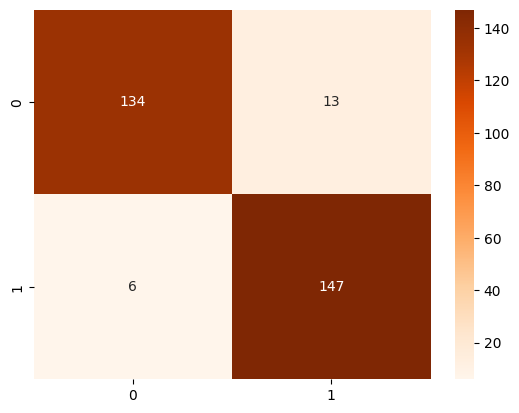

In [18]:
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Oranges')

**Evaluate Algorithm using Accuracy Score**

In [19]:
print("Accuracy for this model:", round(accuracy_score(y_test, y_prediction) * 100, 2), "%")

Accuracy for this model: 93.67 %


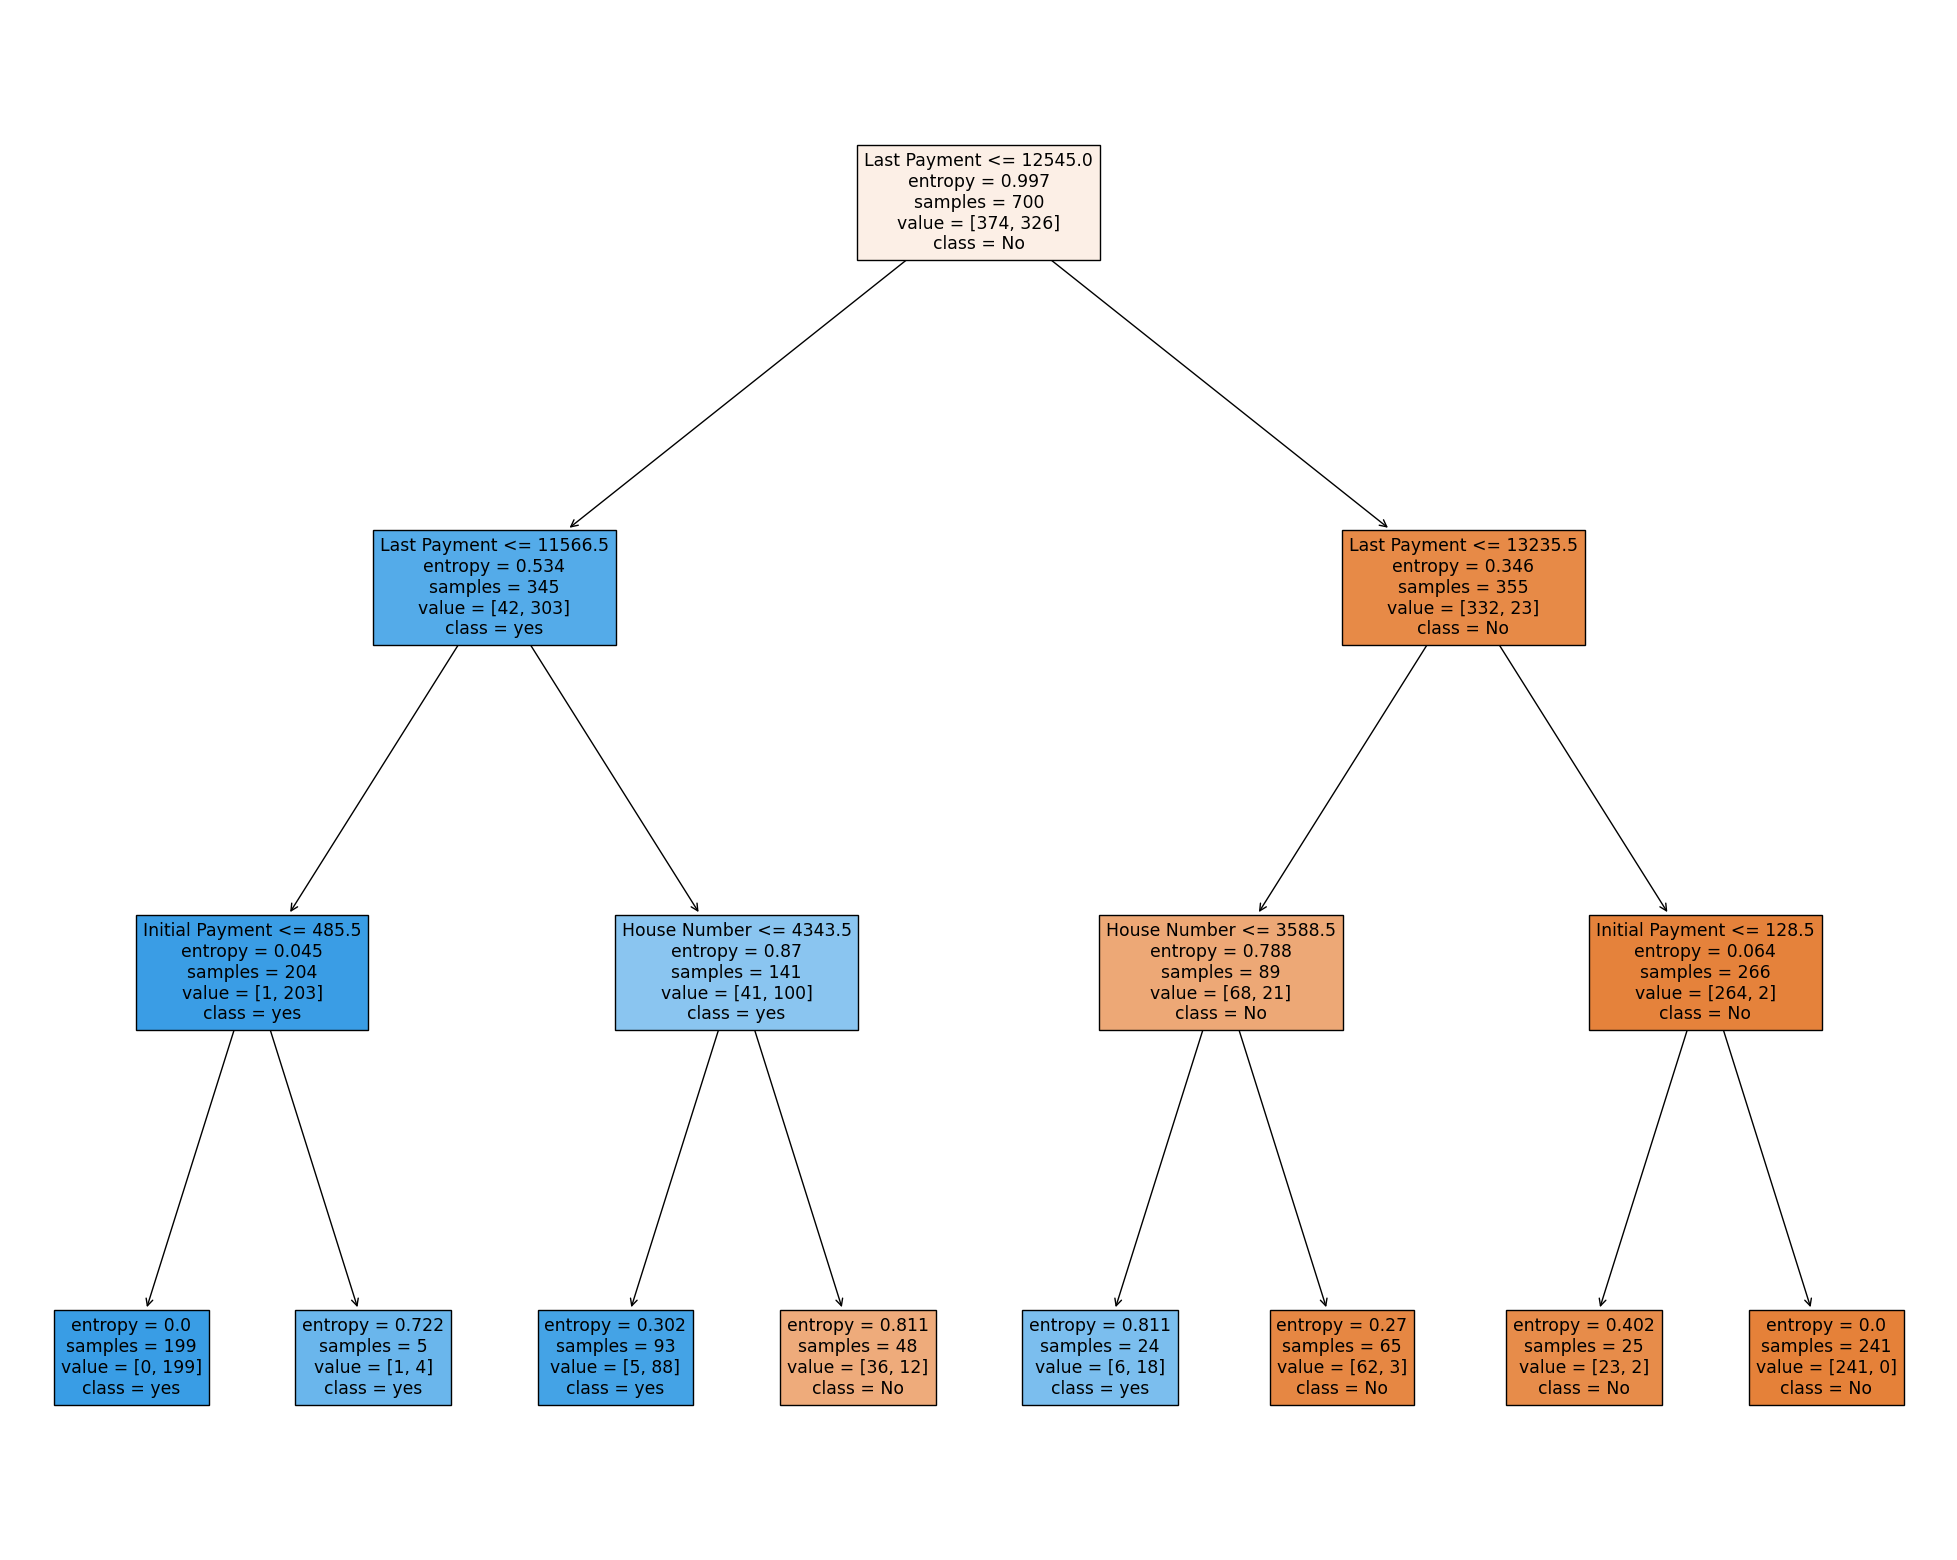

In [20]:
#Visualize the decision tree for better understanding
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, feature_names=X.columns, class_names = classifier.classes_, filled=True)